In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

(556, 830, 3)


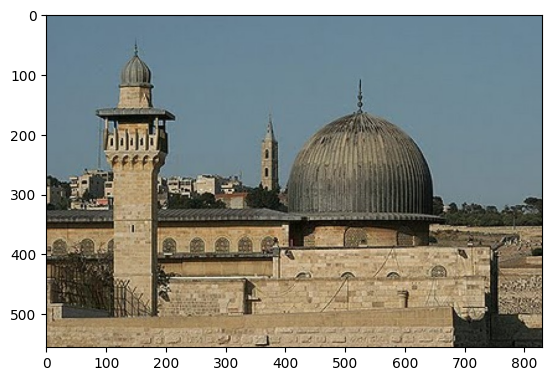

In [50]:
image1 = imread('aqsa.jpeg')
image1

print(image1.shape)


(556, 830)


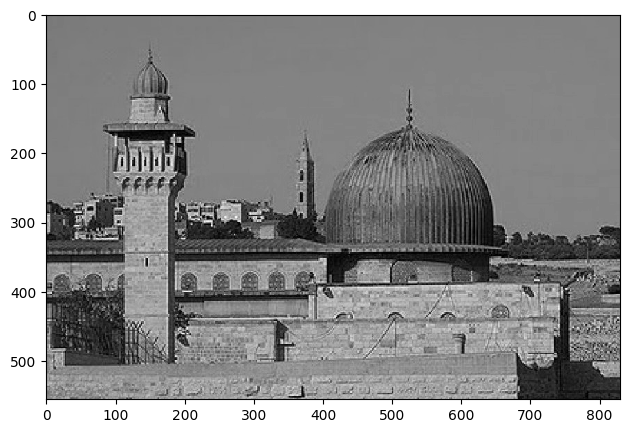

In [32]:
image2 = imread('aqsa.jpeg', as_gray=True)
imshow(image2)
print ((image2.shape))

In [14]:
#Shape of images
print(image1.shape)
print(image2.shape)

(556, 830, 3)
(556, 830)


In [15]:
print(image1.size)
print(image2.size)

1384440
461480


**Feature extraction**

1. Pixel Features

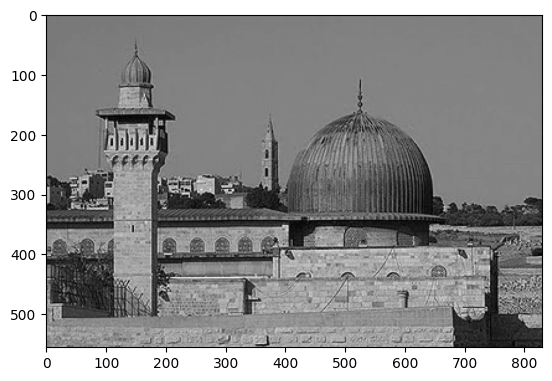

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image1 = cv2.imread('aqsa.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')



In [7]:
pixel_feat2 = np.reshape(image1, (556 * 830 * 3))
pixel_feat2

array([ 98, 127, 145, ...,  54,  56,  53], dtype=uint8)

2. Edge Features

### Previt kernel

* Prewitt Horizontal Kernel:

[ -1 -1 -1 ] <br>
[  0   0   0 ] <br>
[  1   1   1 ]

In [58]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v

pre_hor = prewitt_h(image2)
pre_ver = prewitt_v(image2)

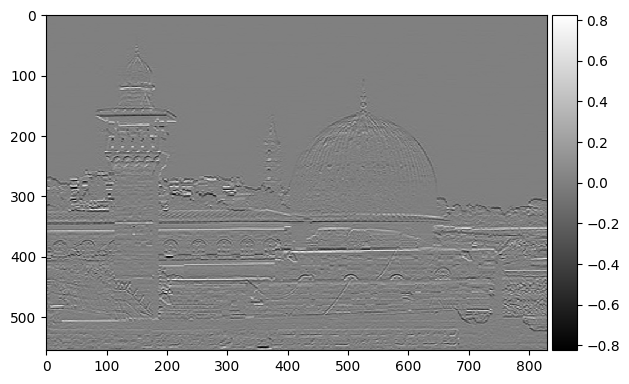

In [60]:
imshow(pre_hor, cmap='gray')

* Prewitt Vertical Kernel:

[ -1  0  1 ] <br>
[ -1  0  1 ] <br>
[ -1  0  1 ]

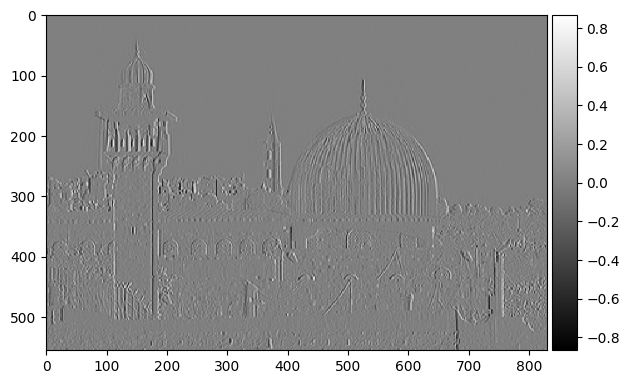

In [10]:
pre_ver = prewitt_v(image2)
imshow(pre_ver, cmap='gray')

* Sobel Operator Vertical

[ -1  0  1 ] <br>
[ -2  0  2 ] <br>
[ -1  0  1 ]

* Sobel Operator Horizontal

[ -1  -2  -1 ] <br>
[  0  0  0 ] <br>
[ 1  2  1 ]

In [4]:
import skimage

dir(skimage)

['__version__',
 'color',
 'data',
 'draw',
 'exposure',
 'feature',
 'filters',
 'future',
 'graph',
 'io',
 'measure',
 'metrics',
 'morphology',
 'registration',
 'restoration',
 'segmentation',
 'transform',
 'util']

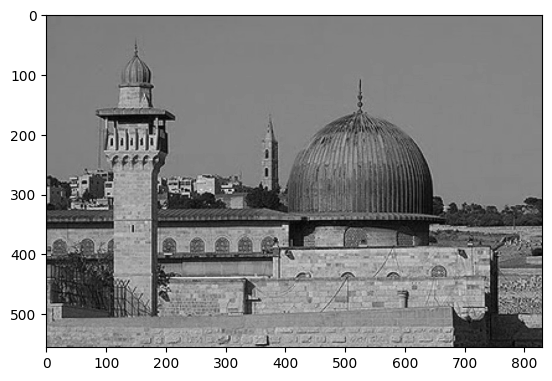

In [78]:
# Sobel Kernel
image_2 = imread('aqsa.jpeg', as_gray= True)
plt.imshow(image2, cmap= 'gray')
ed_sobel = filters.sobel(image_2)

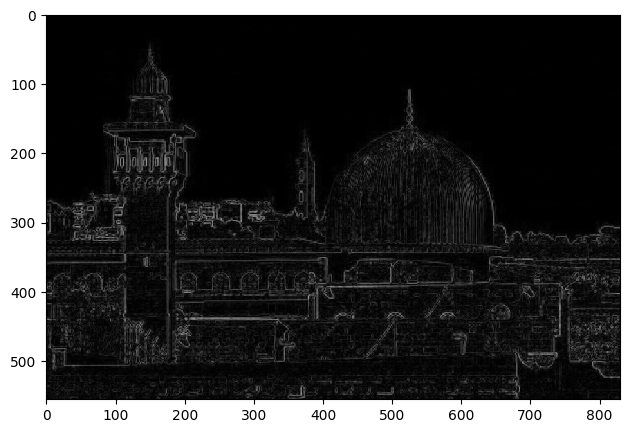

In [80]:
imshow(ed_sobel)

In [88]:
#canny algorithm
image_new = imread('kid.jpg', as_gray= True)
can = feature.canny(image_new)
can

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

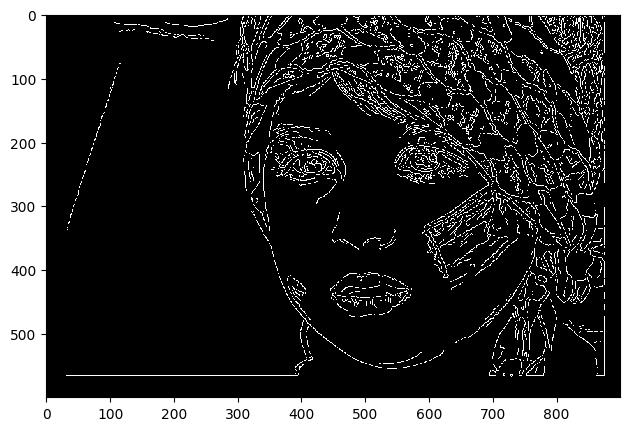

In [89]:
imshow(can, cmap='gray')

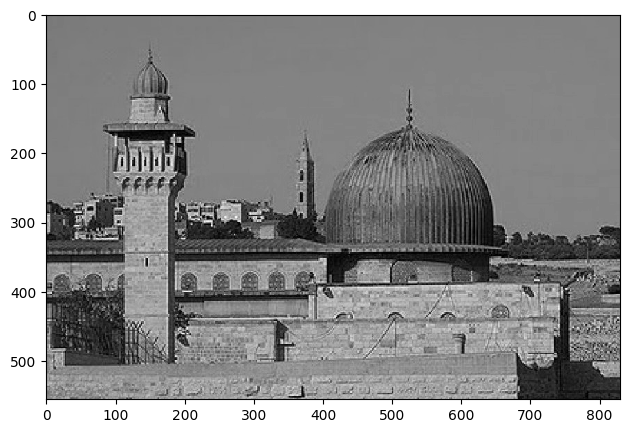

In [15]:
from skimage import color
grayscale = color.rgb2gray(image1)

imshow(grayscale)
plt.show()

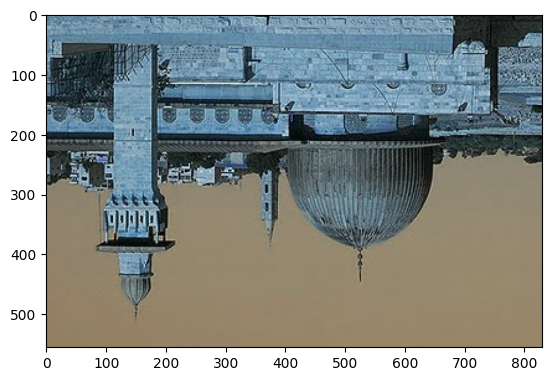

In [97]:
# Flip the image in up direction
verticalflip = np.flipud(image1)

# imshow(verticalflip)
plt.imshow(verticalflip)

(256, 128, 3)


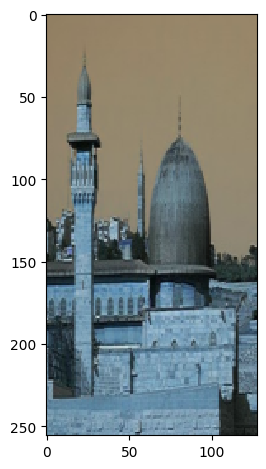

In [99]:
from skimage.transform import resize
resized_img = resize(image1, (256,128))
imshow(resized_img)
print(resized_img.shape)

In [ ]:
# resized_img=image1

In [100]:
from skimage.feature import hog
from skimage import exposure
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

TypeError: hog() got an unexpected keyword argument 'multichannel'

NameError: name 'resized_img' is not defined

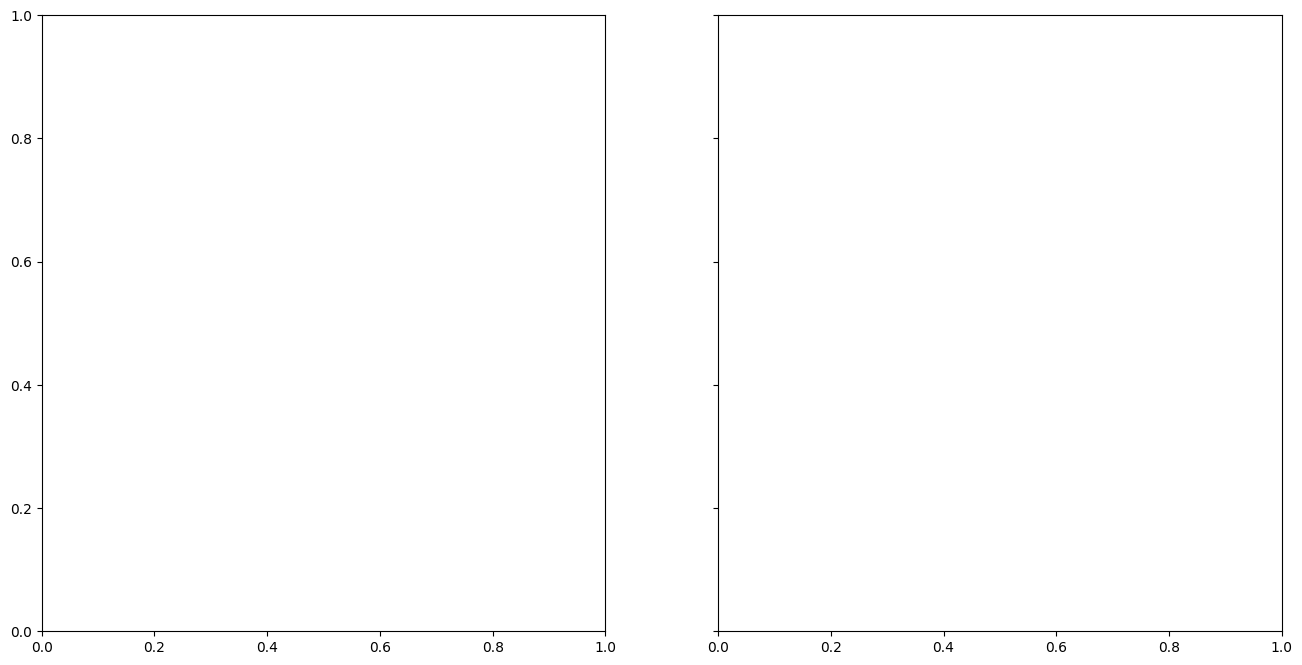

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
#feature vector
fd

array([0.27109908, 0.11991819, 0.02497091, ..., 0.07400005, 0.10588588,
       0.06115505])

In [ ]:
!pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2

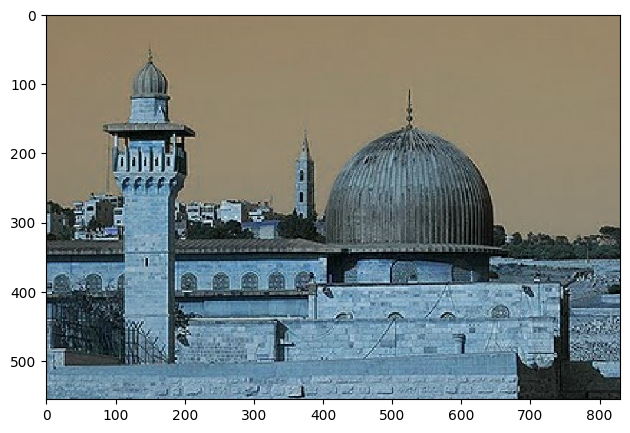

In [24]:

image = cv2.imread('aqsa.jpeg')

imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# Display the grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
new_width = 500
new_height = 600

resized_image = cv2.resize(image, (new_width, new_height))

imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: unhashable type: 'numpy.ndarray'

In [27]:
cv2.imwrite('new_image.jpg', resized_image)

True

### Gausian Kernel

[1 2 1]<br>
[2 4 2]<br>
[1 2 1]

In [28]:
blurred_image = cv2.GaussianBlur(resized_image, (35,35), 0)

# Display the blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [29]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding (adjust the threshold value as needed)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('Binary Thresholded Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Detect faces

In [31]:
import cv2

image = cv2.imread('kid.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(300, 300))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('kid.jpg', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
import cv2

bg_subtractor = cv2.createBackgroundSubtractorMOG2()

cap = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)


    cv2.imshow('Foreground Mask', fg_mask)

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Lab Tasks

1. Read an image and convert it to grey scale. Apply sobel kernel using opencv and from scratch (vertical).
3. Apply gausian filter kernal to blur an image from scratch and opencv (Use RGB image and 3x3 gausian kernel).
4. Upload a group image and all detect faces in it (5 people at least).
5. Upload a video of people preferably walking of people count how many occurances of people are in it (if the person's face is appearing at +20 or -20 pixels from center in consective frames then assume it as same person).
6. Upload a video and apply gausian kernal on it in frames where a face is appeared.
7. Upload a video and apply canny edge detector on it in frames where there is no frame.

In [4]:
import cv2
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v

556
556
[[[ 98 127 145]
  [ 98 127 145]
  [ 98 127 145]
  ...
  [105 134 152]
  [105 134 152]
  [105 134 152]]

 [[ 98 127 145]
  [ 98 127 145]
  [ 98 127 145]
  ...
  [105 134 152]
  [105 134 152]
  [105 134 152]]

 [[ 98 127 145]
  [ 98 127 145]
  [ 98 127 145]
  ...
  [105 134 152]
  [105 134 152]
  [105 134 152]]

 ...

 [[154 133  88]
  [156 135  90]
  [158 137  94]
  ...
  [ 28  30  25]
  [ 46  48  43]
  [ 48  50  45]]

 [[155 134  89]
  [157 136  91]
  [158 137  94]
  ...
  [ 19  21  18]
  [ 41  43  40]
  [ 45  47  44]]

 [[154 133  88]
  [153 132  87]
  [153 132  89]
  ...
  [ 34  36  33]
  [ 52  54  51]
  [ 54  56  53]]]


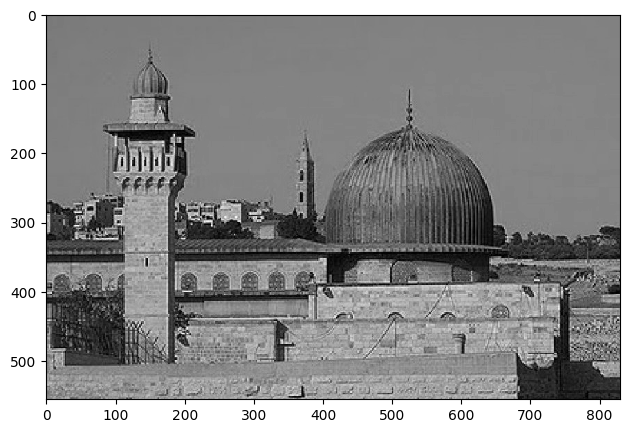

In [10]:
image1 = imread('aqsa.jpeg')
image1
imshow(image1)
image2 = imread('aqsa.jpeg', as_gray=True)
print (len(image1))
print(len(image2))
imshow(image2)
# Sobel Kernel
print(image1)


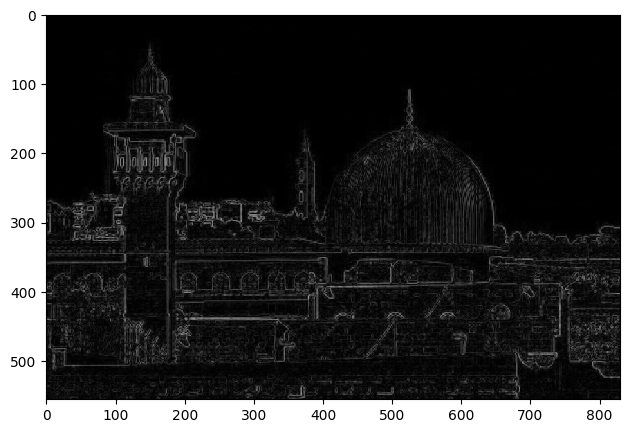

In [11]:
ed_sobel = filters.sobel(image2)

imshow(ed_sobel, cmap='gray')

C:\Users\Shahz\AppData\Local\Temp\ipykernel_23204\1657726996.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result_matrix = np.zeros_like(image_matrix, dtype=np.float)


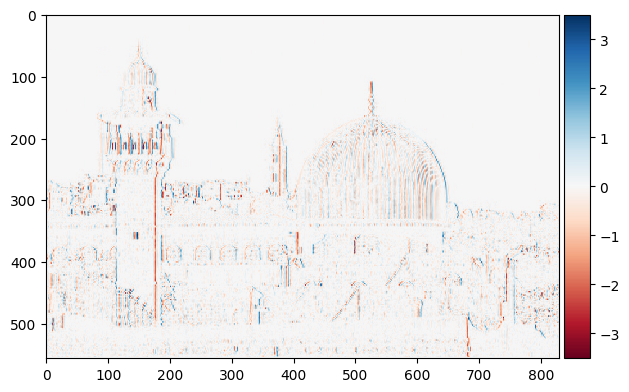

In [37]:
# sobel_kernel_1 = [ [ -1 , 0 , 1 ], [ -2,  0,  2 ], [ -1,  0,  1 ]]
# # [ -1 -2 -1 ]
# # [ 0 0 0 ]
# # [ 1 2 1 ]
# image = image2
# img = np.zeros(image.shape)

# for i in range(0, image.shape[0] -1):
#   for j in range(0,image.shape[1] - 1):
#       operation = 0
#       for k in range(-1, 2):
#         for l in range(-1,2):
#               operation += sobel_kernel_1[k][l]  *image[i+k][j+l]
#         img[i][j]= operation
# imshow(img)
import numpy as np

# Define the Sobel kernel
sobel_kernel_1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Load or create your image matrix
# Assuming you have a grayscale image represented as a 2D NumPy array, 'image_matrix'

# Get the dimensions of the image and the kernel
image_matrix = image
image_height, image_width = image_matrix.shape
kernel_size = sobel_kernel_1.shape[0]

# Initialize an empty result matrix
result_matrix = np.zeros_like(image_matrix, dtype=np.float)

# Apply the Sobel kernel to the image using convolution
for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
        # Extract the neighborhood of the pixel
        neighborhood = image_matrix[i - 1:i + 2, j - 1:j + 2]
        # Perform element-wise multiplication and sum
        convolution_result = np.sum(neighborhood * sobel_kernel_1)
        # Store the result in the output matrix
        result_matrix[i, j] = convolution_result

# The 'result_matrix' now contains the result of applying the Sobel kernel to the image
imshow(result_matrix)

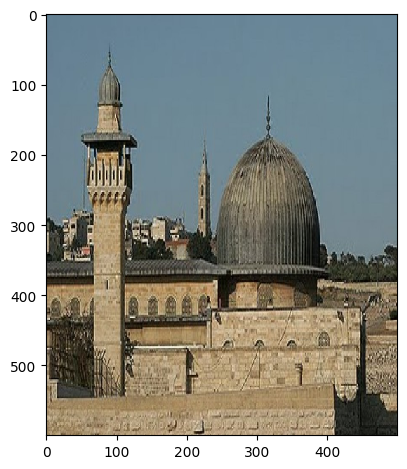

In [12]:
#Task 2
new_width = 500
new_height = 600
resized_image = cv2.resize(image1, (new_width, new_height))

imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


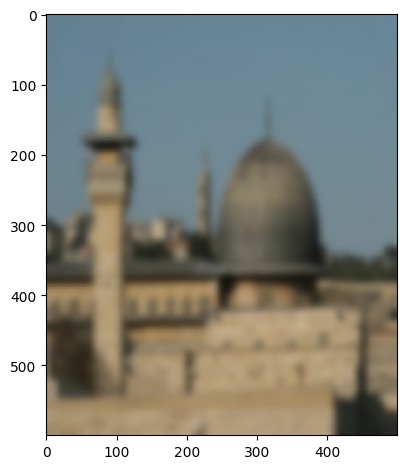

In [ ]:
blurred_image = cv2.GaussianBlur(resized_image, (35,35), 0)

# Display the blurred image
imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


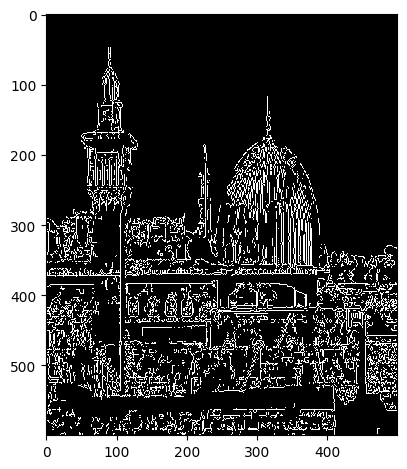

In [ ]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)
imshow( edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


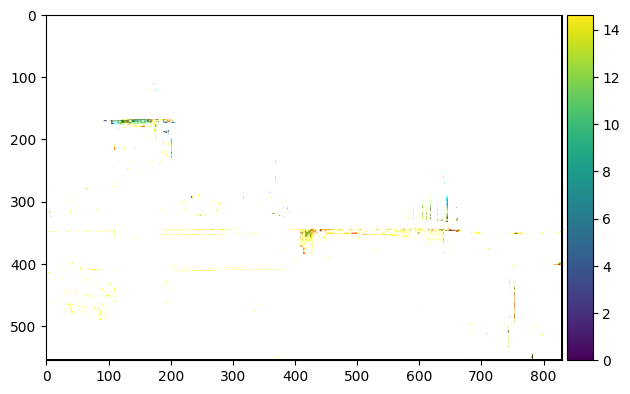

In [45]:
guassian_kernel_1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
image = imread('aqsa.jpeg')
img = np.zeros(image.shape)

for i in range(0, image.shape[0] -1):
  for j in range(0,image.shape[1] - 1):
      operation = 0
      operation_2 = 0
      operation_3 = 0
      for k in range(-1, 2):
        for l in range(-1,2):
              operation += guassian_kernel_1[k][l]  *image [i+k][j+l][0]
              operation_2 += guassian_kernel_1[k][l]  *image [i+k][j+l][1]
              operation_3 += guassian_kernel_1[k][l]  *image [i+k][j+l][2]
        img[i][j][0] = operation/16
        img[i][j][1] = operation_2/16
        img[i][j][2] = operation_3/16

imshow(img)

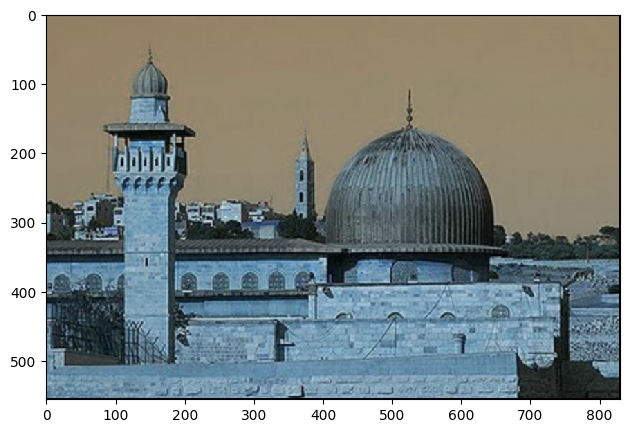

In [46]:
import numpy as np
import cv2

# Define the Gaussian kernel (normalized)
gaussian_kernel_1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0

# Load or create your 3D image
image_3d = cv2.imread('aqsa.jpeg')

# Get the dimensions of the image and the kernel
image_height, image_width, num_channels = image_3d.shape
kernel_size = gaussian_kernel_1.shape[0]

# Initialize an empty result matrix
result_image = np.zeros_like(image_3d, dtype=np.uint8)

# Apply the Gaussian kernel to each color channel separately
for channel in range(num_channels):
    for i in range(1, image_height - 1):
        for j in range(1, image_width - 1):
            # Extract the neighborhood of the pixel for the current color channel
            neighborhood = image_3d[i - 1:i + 2, j - 1:j + 2, channel]
            # Perform element-wise multiplication and sum
            convolution_result = np.sum(neighborhood * gaussian_kernel_1)
            # Store the result in the output image
            result_image[i, j, channel] = convolution_result

# The 'result_image' now contains the result of applying the Gaussian kernel to the 3D image
imshow( result_image)




In [1]:
image2 = imread('aqsa.jpeg', as_gray=True)
sobel_kernel_1 = [ [ 1 , 2 , 1 ], [ 2,  4,  2 ], [ 1,  2,  1 ]]
image = image2
img = np.zeros(image.shape)

for i in range(0, image.shape[0] -1):
  for j in range(0,image.shape[1] - 1):
      operation = 0
      for k in range(-1, 2):
        for l in range(-1,2):
              operation += sobel_kernel_1[k][l]  *image[i+k][j+l]
        img[i][j]= operation/16
imshow(img)

NameError: name 'imread' is not defined

In [7]:
import cv2
help(skimage)

Help on package skimage:

NAME
    skimage - Image Processing for Python

DESCRIPTION
    ``scikit-image`` (a.k.a. ``skimage``) is a collection of algorithms for image
    processing and computer vision.
    
    The main package of ``skimage`` only provides a few utilities for converting
    between image data types; for most features, you need to import one of the
    following subpackages:
    
    Subpackages
    -----------
    color
        Color space conversion.
    data
        Test images and example data.
    draw
        Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
    exposure
        Image intensity adjustment, e.g., histogram equalization, etc.
    feature
        Feature detection and extraction, e.g., texture analysis corners, etc.
    filters
        Sharpening, edge finding, rank filters, thresholding, etc.
    graph
        Graph-theoretic operations, e.g., shortest paths.
    io
        Reading, saving, and displaying images and video.
    m

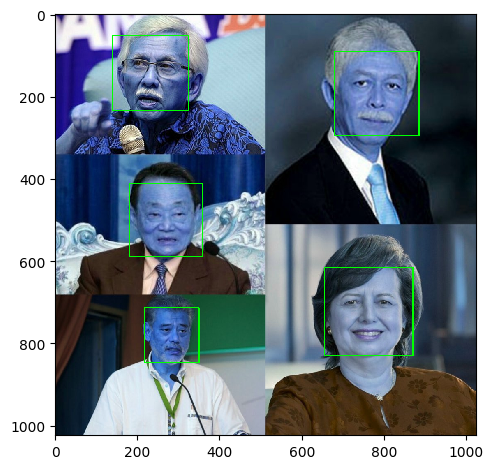

In [ ]:
#Task 3
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/5people_image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(10, 10))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
dir(cv2)

['ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'B

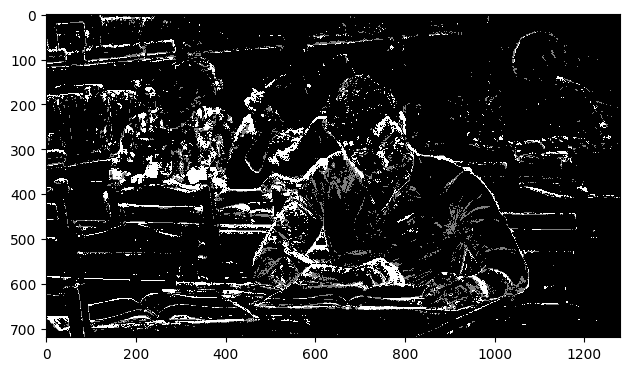

In [ ]:
import cv2

bg_subtractor = cv2.createBackgroundSubtractorMOG2()

cap = cv2.VideoCapture('/content/mixkit-man-focused-on-study-for-exam-in-library-9049-medium.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)


    imshow( fg_mask)

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [9]:
import pandas as pd
import numpy as np

In [13]:
data = {'a':[1,2,3,4],'b':[4,5,6,7], 'c':[9,8,'T','D']}
df = pd.DataFrame(data)
datanew= df.groupby(['a','b'])
print(datanew)